## SSB30806: Modelling in Systems Biology

### Week 3 practical 1

In this practical we will work on:

- Determining steady states by hand and by using simulations;
- Determining the stability of steady states by hand, by using direction fields, and/or by using the Jacobian matrix and eigenvalues;
- Determining a bifurcation using steady state analysis;
- Eyeball fitting a model on some data.

Solutions will be made available on Brightspace.


### The logistic equation
The logistic growth has long been used for describing the growth of a population under limitation. For instance, Gause et al. (1934) published fits of the logistic model to data of *Paramecium* in batch experiments. Below we see a reproduced fit to the population density of *P. caudatum* ($N$) changing in time ($t$).



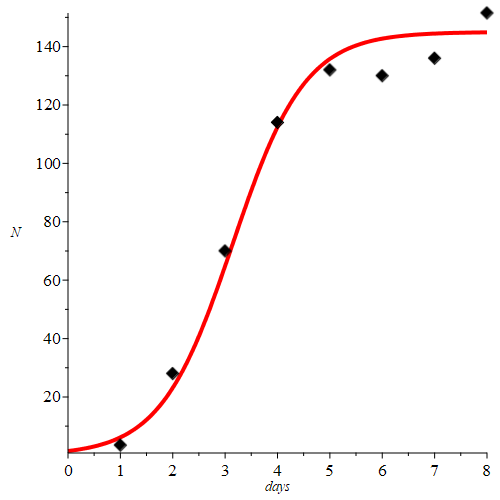

Consider first the equation
\begin{equation}
	\frac{dX}{dt}=rX \quad \quad \text{Eq. (1)}
\end{equation}
We drop the time-dependence of population size X in the notation, but this variable depends on time. 
The explicit solution of Eq. (1) can be found by separation of variables, followed by antidifferentiation:
\begin{equation}
\int \frac{1}{X} dX= \int r dt
\end{equation}
\begin{equation}
\ln⁡(|X|)=rt+C
\end{equation}
\begin{equation}
X=ce^{rt}
\end{equation}
We would then have an explicit description of the population size as function of time. We consider $t≥0$, and $c$ is a constant that can be determined by setting an initial condition. 

It is obvious that the state variable in Eq. (1) will continue to grow exponentially. In other words, it has no steady state other than $X=0$. This makes no biological sense, because at some point a limitation will kick in, as seen in the data published by Gause et al. (1934).


The Pearl-Verhulst or logistic equation is a way to impose such a restriction. It is given as
\begin{equation}
\frac{dX}{dt} = \dot{X} = rX\left(1-\frac{X}{K}\right)  \quad \quad \text{Eq. (2)}
\end{equation}
Suppose that $X$ denotes the total population size in a limited spatial area.


### Question 1: 
Give the meaning of $r$ and $K$, and give their dimensions.

<font color='red'>
$r$ is the intraspecific growth rate of the population. Its dimensions are [per time].

$K$ is the carrying capacity. Its dimensions are identical to that of $X$ [mass $X$].
             </font>

The logistic equation has a nontrivial (nonzero) steady state $X=K$ (see the tutorial slides). Your most likely assumption is that the nonzero steady state will be stable, i.e., the population will eventually grow to $K$. We can prove this by looking at the derivative of the ODE, because this gives the direction of change.

### Question 2: 
Algebraically determine the derivative of Eq. (2) with respect to $X$. 

<font color='red'>
Expand the brackets:
\begin{equation}
\dot{X} = rX - rX^2/K
\end{equation}
Then differentiate using the sum rule:
\begin{equation}
\frac{d\dot{X}}{dX} = r - \frac{2rX}{K}
\end{equation}
    </font>

Even without knowing the exact values of $r$ and $K$, we can determine the stability of the nonzero state.

### Question 3:
Verify the stability of the nonzero steady state of Eq. (2), using the derivative found in the previous question. Assume  $r,K>0$. *(Hint: Verify your results by evaluating the derivative.)*

<font color='red'>
The state is $X=K$, so:
\begin{equation}
f(X)=f(K)=r-2r\cdot \frac{K}{K}=-r\lt0
\end{equation}
</font>

There is also an algebraic solution of Eq. (2). It is given as:
\begin{equation}
	X(t)=\frac{KX_0}{X_0+(K-X_0 ) e^{-rt}} \quad \quad \text{Eq. (3)}
\end{equation}
We encourage you to verify it by hand (see, for instance, the book for Mathematics 2 (MAT14903), p. 206). 

Algebraic solutions present a strong verification for your numerical code. 

### Question 4:
Implement Eq. (2) in R or Python. Use $r=0.5$ and $K=1$. Use $X(0)=0.2$. Also use some other initial conditions, including $X(0)=0.1$. Confirm your numerical results using your algebraic solutions and Eq. (3). 

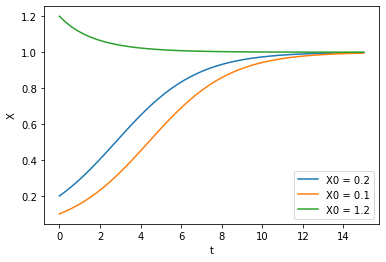

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

def eq2(x,t,r,K):
    X = x[0]
    dxdt = r*X*(1-X/K)
    return [dxdt]

X0 = 0.2
r = 0.5
K = 1
pars = (r,K)
times = np.linspace(0,15,50)
xt = odeint(eq2,[X0],times,pars)
Xt1 = xt[:,0]
plt.plot(times,Xt1, label = 'X0 = 0.2')

X0 = 0.1
xt = odeint(eq2,[X0],times,pars)
Xt2 = xt[:,0]
plt.plot(times,Xt2, label = 'X0 = 0.1')

X0 = 1.2
xt = odeint(eq2,[X0],times,pars)
Xt3 = xt[:,0]
plt.plot(times,Xt3, label = 'X0 = 1.2')

plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.show()


### Determining stability of steady states: direction fields and plots

An important way of studying the stability of a steady state is by looking at the direction field of the model. We evaluate the function Eq. (2) (i.e., we substitute a particular value of $t$ and $X$ and calculate the value of $dX/dt$) at different points and plot these derivatives in a plot. For instance, for $r=0.5$ and $K=1$, we have the following:

|  t  |  X(t) |   dX(t)/dt    |
|:-----:|:-------:|:---------------:|
|   0   |   0.2   |     0.08        |
|   1   | 0.29186 |     0.10334     |
|   2   |   ...   |       ...       |
|   5   | 0.75285 |       ...       |
|   10  |   ...   |       ...       |
|   25  |   ...   | 7x10^(-6) |

### Question 5:
Complete the above Table using Eq. (2) and Eq. (3).

In [2]:
def eq3(t,r,K,X0):
    return K*X0/(X0+(K-X0) * np.exp(-r*t))

t = np.array([0,1,2,5,10,25])
Xt = eq3(t, 0.5, 1, 0.2)
dXdt = eq2([Xt],t,r,K)[0]

print('t:',t)
print('X(t):', Xt)
print('dX(t)/dt:',dXdt)


t: [ 0  1  2  5 10 25]
X(t): [0.2        0.29187513 0.40460968 0.75281931 0.97375555 0.99998509]
dX(t)/dt: [8.00000000e-02 1.03342020e-01 1.20450343e-01 9.30411979e-02
 1.27778409e-02 7.45308414e-06]


We are plotting $X(t)$ (the ‘y coordinate’) as function of $t$ (the ‘x coordinate’). A direction field is constructed from drawing the direction vector at each support point $t=a$, or alternatively, drawing a small part of the tangent line to the graph in that point. Recall, that the vector representation of a tangent line to a point is:

\begin{equation}
\begin{pmatrix}
t\\
X(t)
\end{pmatrix}=
\begin{pmatrix}
a\\
f(a)
\end{pmatrix}
+ \lambda
\begin{pmatrix}
1\\
f'(a)
\end{pmatrix}
\end{equation}

Here $f(a)$ is Eq. (3), and $f'(a)$ is Eq. (2) with the value of Eq. (3) substituted. We can convert the vector representation to an algebraic expression by rewriting the upper row:

$t = a + \lambda \longrightarrow \lambda = t - a$
	
Then substituting this into the lower row:

\begin{equation}
X(t) = f(a) + \lambda f'(a) = f(a) + f'(a)(t-a)
\end{equation}

You recognize this as the algebraic representation of a tangent line in the point $t=a$. For instance, in the point $(1,0.29186)$ we have:

\begin{equation}
X(1) \approx f(1) + f'(1) (t-1) = 0.29186 + 0.10334 (t-1) = 0.18853 + 0.10334t 
\end{equation}

The vector for that point is:

\begin{equation}
\begin{pmatrix}
1\\
0.29186
\end{pmatrix}
+ \lambda
\begin{pmatrix}
1\\
0.10334
\end{pmatrix}
\end{equation}
	
After drawing the direction vectors, you get something like the following (in the first panel with vectors, in the second panel in blue dotted the ODE solution and the tangents in red):


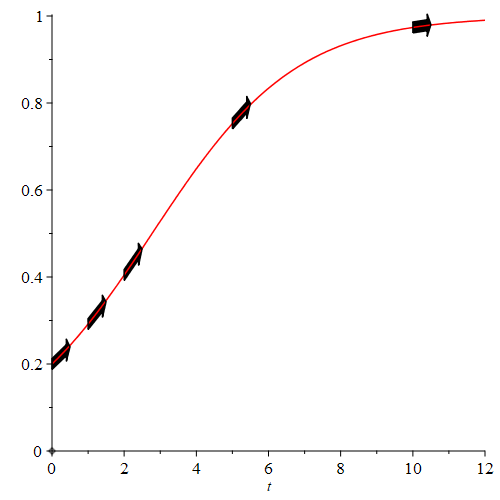


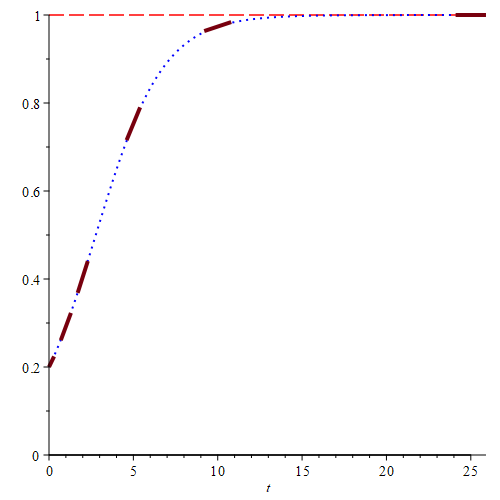

The red curve in the first graph is the simulation result for $r=0.5$, $K=1$, and $X(0)=0.2$. You see that the vectors indicate the direction in which the simulation develops. We can extend this graph to include, e.g., also vectors for the initial conditions $X(0)=0$, $X(0)=0.1$, and $X(0)=1$:

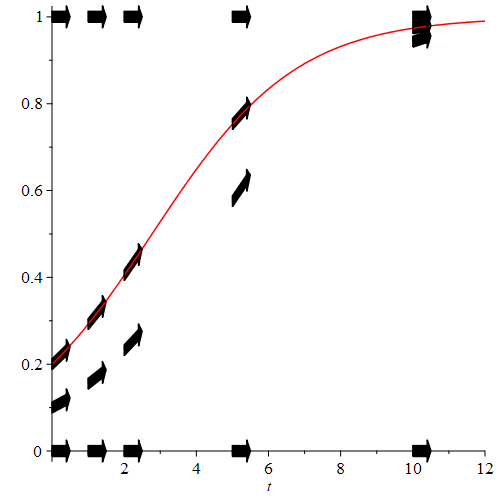

### Question 6:
Explain how you can conclude from this that the steady state $X=K=1$ is stable, and $X=0$ is unstable.

<font color='red'>
All vectors for X=0 are horizontal and lie along the x-axis, indicating there is no change, i.e., X=0 is a steady state. Vectors for X=K=1 are again horizontal along y=1, indicating no change and hence X=K is a steady state. All vectors not for X(0)=0 form a sequence deviating from X=0 and towards X=K. Hence, X=0 is unstable, and X=1 is stable.
    </font>
    

In practice, evaluating the derivatives for many different values of $\left(t,X(t)\right)$ is cumbersome. In addition, you often do not have the explicit solution, such as Eq. (2) as explicit solution of Eq. (1). If you want to draw a direction field, you can resort to numerical means for drawing it, so we can still graphically determine the stability of steady states. For instance, in R, you can use the package ‘phaseR’ for this. In python there isn't a direct equivalent of this function, so we have predefined the following function for you to use:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def dfield(ode, pars, xlim, ylim, npointsx = 13, npointsy = 13):
    t_range = np.linspace(xlim[0],xlim[1],npointsx)
    X_range = np.linspace(ylim[0],ylim[1],npointsy)
    T,X = np.meshgrid(t_range,X_range)
    
    dXdt = ode([X],T,*pars)

    V = np.copy(dXdt[0])
    U = np.ones(V.shape)

    plt.quiver(T,X,U,V, angles = 'xy', scale_units = 'xy', pivot = 'mid')

This function takes the ode function that you also used for odeint, a tuple or list of parameters, and the minimum and maximum values of the two axes in tuples or lists. 

### Question 7: 
Make a direction field using Python or R, and verify with the earlier graph whether you see the same general pattern. You can also add some trajectories of individual solutions to the direction field by calling the plot function after the dfield function (as long as you don't call 'show()' inbetween).


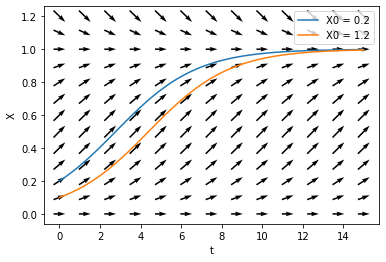

In [4]:
xlim = (0,15)
ylim = (0,1.2)
dfield(eq2, pars, xlim, ylim)
plt.plot(times,Xt1, label = 'X0 = 0.2')
plt.plot(times,Xt2, label = 'X0 = 1.2')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.show()
plt.close()

A direction field may allow you to identify steady states you have missed, or that are attracting from one side, but not attracting from another side (so-called saddle-node points). In the case of one ODE, like with Eq. (2), we can also use another alternative graphical means of determining steady states and their stability. We can plot the ODE as function of the state variable. In this case, if we plot Eq. (2) on the y-axis, and X on the x-axis, we get something like this:

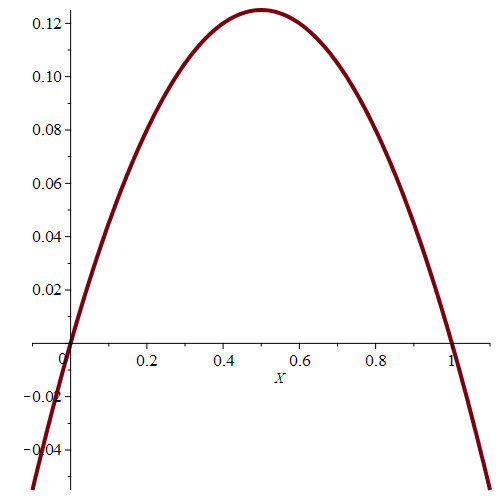

### Question 8: 
Make such a plot with Eq. (2) on the y-axis, and $X$ on the x-axis. Explain how we can determine what are the steady states, and what is the stability of each of them.

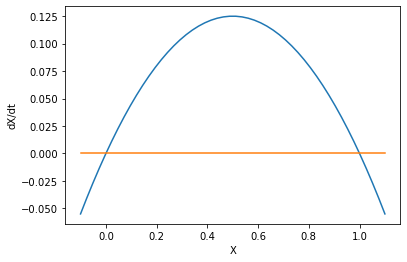

In [5]:
x_range = np.linspace(-0.1,1.1,50)
y = eq2([x_range],0,r,K)[0]
plt.plot(x_range,y)
plt.plot(x_range,np.zeros(len(y)))

plt.xlabel('X')
plt.ylabel('dX/dt')

plt.show()

<font color='red'>
When $0<X<1$, the derivative $\dot{X}$ is positive, indicating growth. When $X<0$ or $X>1$, $\dot{X}$ is negative, indicating (further) decrease. So, all orbits will diverge from $X=0$ and converge to $X=K=1$.
</font>

### Eyeball fitting
Now consider the following data file from an experiment by Gause et al. (1935). The data are measurements of yeast cell volumes as a function of time (hours):

In [6]:
# time points of measurements
time = np.array([0,1.5,9,10,18,23,25.5,27,38,45.5])

# Yeast cell volumes
volume = np.array([0.37,1.63,6.2,8.87,10.66,12.5,12.6,12.9,12.77,12.9])


### Question 9: 
By trying out different values of $r$, $K$, and the initial condition, see if you can get an appropriate fit to the data. (*Hint: Think about a logical starting point for the initial condition and the value of $K$. Start, e.g., with $r=0.5$, $K=10$, and $0<X(0)<1$.*) To plot the data as individual points instead of lines, you can add a third argument to the plot function: *plot(time, volume, 'o')*

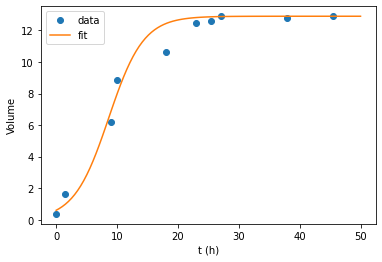

In [7]:
X0 = 0.6
r = 0.35
K = 12.9
times = np.linspace(0,50,100)
xt = odeint(eq2, X0, times, (r,K))
X = xt[:,0]

plt.plot(time, volume, 'o', label = 'data')
plt.plot(times,X, label = 'fit')

plt.legend()
plt.xlabel('t (h)')
plt.ylabel('Volume')

plt.show()
plt.close()


In the logistic model only the population is explicitly considered. We now turn our attention to another model, in which we explicitly consider substrate dynamics in a chemostat reactor, i.e., we now have a model consisting of two ODEs:
\begin{equation}
\begin{aligned}
\frac{dX}{dt} &= D(X_{in}-X) - \frac{eXN}{k+X} \qquad \qquad  &\text{Eq. (3a)}  \\
\frac{dN}{dt} &= y\frac{eXN}{k+X} - DN \qquad \qquad  &\text{Eq. (3b)}
\end{aligned}
\end{equation}
Here $D$ is the dilution rate (with units ‘per time’) through a well-mixed chemostat reactor, such that the influx and outflux rates are identical; $X$ is the explicitly modelled substrate (in mol per volume) needed for population $N$ (also in mol per volume) to grow, where $X_{in}$ is the concentration of the substrate entering the chemostat; the growth of $N$ follows a Holling type II functional response (i.e., Michaelis-Menten kinetics), with $e$ an ingestion rate, and $y$ a yield efficiency of the conversion from the substrate to $N$. For $N=0$, there is a trivial steady state $X=X_{in}$, which essentially says that if there is no population to feed on the substrate, it will flow out of the chemostat reactor in the same density per time as it enters. Eqs. (3a-b) also have a nontrivial steady state, given as:
\begin{equation}
\tilde{X} = \frac{Dk}{ye - D} \quad \quad \tilde{N} = \frac{y(DX_{in} + Dk - yeX_{in})}{D-ye}
\end{equation}

### Question 10:
Algebraically determine the partial derivatives of Eqs. (3a-b) with respect to the state variables.  (*Hint: If you struggle with partial derivatives, consider MAT14903 (Mathematics 2) and in particular tutorial 9 of the course MAT15003 (Mathematics 3) again.*)

<font color='red'>
You have four. They are:

\begin{equation}
\frac{\partial}{\partial X} \left( D(X_{in}-X) - \frac{eXN}{k+X} \right) = -D - \frac{eN(k+X)-eXN}{(k+X)^2} = -D-\frac{eNk}{(k+X)^2}
\end{equation}
(Quotient rule; $X_{in}$ is a constant)

\begin{equation}
\frac{\partial}{\partial N} \left( D(X_{in}-X) - \frac{eXN}{k+X} \right) = -\frac{eX}{k+X}
\end{equation}
($-\frac{eX}{k+X}$ can simply be teated as constant)

\begin{equation}
\frac{\partial}{\partial X} \left( y\frac{eXN}{k+X} - DN \right) = \frac{yeN(k+X)-yeNX}{(k+X)^2} = \frac{yeNk}{(k+X)^2}
\end{equation}
(Quotient rule again; $DN$ can be considered constant)

\begin{equation}
\frac{\partial}{\partial N} \left( y\frac{eXN}{k+X} - DN \right) = \frac{yeX}{k+X} - D
\end{equation}
(sum rule; $-\frac{eX}{k+X}$ can be teated as constant again)
</font>


Given are the following parameter values: $X_{in}=10,D=0.1,e=1,y=0.5,k=1$.

### Question 11:
Substitute the above parameter values and determine the eigenvalues, manually or by using R or Python of the above nontrivial steady state, and indicate whether this steady state is stable or not. In python, you can find eigenvalues using the numpy function eigvals (from numpy.linalg import eigvals) on the filled out Jacobian matrix.

<font color='red'>
Substituting the parameter values in the algebraic steady states:
\begin{equation}
\tilde{X} = \frac{Dk}{ye - D} = \frac{0.1\cdot 1}{0.5\cdot 1-0.1} = 0.25
\end{equation}
\begin{equation}
\tilde{N} = \frac{y(DX_{in} + Dk - yeX_{in})}{D-ye} = \frac{0.5(0.1\cdot 10+0.1\cdot 1-0.5\cdot 1\cdot 10)}{0.1-0.5\cdot 1} = 4.875
\end{equation}

Substitute the parameter values and the steady state values in the partial derivatives, then construct the Jacobian matrix:
\begin{equation}
J = 
\begin{pmatrix}
-3.22 & -0.2  \\
1.56 & 0
\end{pmatrix}
\end{equation}

Determine eigenvalues:
\begin{equation}
\det
\begin{pmatrix}
-3.22-\lambda & -0.2  \\
1.56 & -\lambda
\end{pmatrix}
~= -\lambda(-3.22-\lambda) - -0.2 \cdot 1.56 = \lambda^2 + 3.22\lambda + 0.312 = 0
\end{equation}

\begin{equation}
\lambda_{1,2} = \frac{-3.22 \pm \sqrt{3.22^2-4\cdot 1 \cdot 0.312}}{2\cdot 1} = \frac{-3.22\pm 3.02}{2}
\end{equation}

Hence: $\lambda_1 = -3.12$ and $\lambda_2 = -0.1$

Both eigenvalues are real and negative, so the steady state is stable (a stable node).
</font>

In [8]:
from numpy.linalg import eigvals

J = np.matrix([[-3.22, -0.2],[1.56, 0]])
print(eigvals(J))



[-3.12 -0.1 ]


### Q12:
Implement the model in Python or R, and use simulation to confirm the results of the previous question.

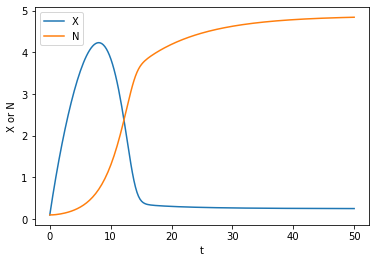

In [9]:
def eq3(states,t,Xin,D,e,y,k):
    X, N = states
    dXdt = D*(Xin-X) - e*X*N/(k+X)
    dNdt = y*e*X*N/(k+X) - D*N
    
    return dXdt,dNdt

Xin = 10
D = 0.1
e = 1
y = 0.5
k = 1
pars = (Xin,D,e,y,k)

x0 = [0.1,0.1]
t = np.linspace(0,50,200)

x_t = odeint(eq3,x0,t,args=pars)
X_t = x_t[:,0]
N_t = x_t[:,1]

plt.plot(t,X_t,label = 'X')
plt.plot(t,N_t,label = 'N')

plt.xlabel('t')
plt.ylabel('X or N')

plt.legend()

plt.show()


Now consider the same parameter values as above, except $X_{in}=0.1$.

### Question 13:
Determine the steady states and their stability as you did above. Do you get the same **qualitative** results as before? Give a biological interpretation of the results.

<font color='red'>
No, you do not. There is only one non-negative steady state: $(0.1,0)$. The other steady state is now negative: $(0.25,-0.075)$. Their stability is:
\begin{equation}
J(0.1,0) = 
\begin{pmatrix}
-0.1 & -0.9091  \\
0 & 0.5454
\end{pmatrix}
\end{equation}
which gives eigenvalues $\lambda_1 = -0.1, \lambda_2 = -0.05454$, so stable.

\begin{equation}
J(0.25,-0.075) = 
\begin{pmatrix}
-0.052 & -0.2  \\
-0.024 & 0
\end{pmatrix}
\end{equation}
which gives eigenvalues $\lambda_1 = -0.1, \lambda_2 = 0.048$, so unstable.

The trivial steady state $(X_{in},0)$ is now stable, i.e., no consumer population can settle.
</font>

There apparently is a bifurcation in this system, a critical value of $X_{in}$ where the system behaviour undergoes a qualitative change.

### Question 14:
In Jupyter, implement a systematic scan in which you step-wise vary the value of $X_{in}$ and calculate the eigenvalues. Locate the bifurcation value of $X_{in}$. *(Hint: you can verify the result by substituting the parameter values in the two steady state values: these should be identical.)*

In [10]:

def SteadyState(Xin,D,e,y,k):
    X = D*k/(y*e - D)
    N = y*(D*Xin + D*k - y*e*Xin)/(D-y*e)
    return X,N

def Jacobian(X,N,Xin,D,e,y,k):
    return np.array([[-D-e*N*k/(k+X)**2, -e*X/(k+X)],
                    [y*e*N*k/(k+X)**2   , y*e*X/(k+X) - D]])


D = 0.1
e = 1
y = 0.5
k = 1

Xin = 10
X,N = SteadyState(Xin,D,e,y,k)
J = Jacobian(X,N,Xin,D,e,y,k)
print(np.linalg.eigvals(J))

Xin = 1
X,N = SteadyState(Xin,D,e,y,k)
J = Jacobian(X,N,Xin,D,e,y,k)
print(np.linalg.eigvals(J))

Xin = 0.5
X,N = SteadyState(Xin,D,e,y,k)
J = Jacobian(X,N,Xin,D,e,y,k)
print(np.linalg.eigvals(J))

Xin = 0.25
X,N = SteadyState(Xin,D,e,y,k)
J = Jacobian(X,N,Xin,D,e,y,k)
print(np.linalg.eigvals(J))

Xin = 0.2
X,N = SteadyState(Xin,D,e,y,k)
J = Jacobian(X,N,Xin,D,e,y,k)
print(np.linalg.eigvals(J))


Xin = 0.25
print(SteadyState(Xin,D,e,y,k))
print((Xin,0))



[-3.12 -0.1 ]
[-0.24 -0.1 ]
[-0.1  -0.08]
[-0.1  0. ]
[-0.1    0.016]
(0.25, -0.0)
(0.25, 0)


<font color='red'>
The bifurcation occurs at $X_{in}=0.25$. This is the point where the two steady states coincide. In other words, substitution of $X_{in}$ in the steady state values should give the same results $(0.25,0)$.
    </font>

### Question 15:
In the previous question, you have calculated the eigenvalues. Explain what you notice with regard to the eigenvalues, and use this to define a criterion based on the eigenvalues for a bifurcation like we have here.

<font color='red'>
The eigenvalues in the bifurcation point $X_{in}=0.25$ are $\lambda_1=-0.1, \lambda_2=0$. The bifurcation is characterised by one eigenvalue equal to zero.
    </font>

References:

https://www.jstor.org/stable/pdf/1145.pdf?casa_token=-Nx4A3JlJfMAAAAA:AZAJMzBb9PBGWKoSuYZv1u8e_O0pn_KaO3V4zVaXHZgMn-1Wj87r1vO_oyM2UJV1CoI1WmEwHIs-r-7_EqU2zQ11q301X6DCfe936OPrAbeMsXZtEFWb
